#📌 Extracción

### Paso 1
Importar la libreria pandas

In [60]:
import pandas as pd

### Paso 2
Importar los datos

In [61]:
df = pd.read_json('TelecomX_Data.json')

### Prueba para verificar la carga correcta de los datos

In [62]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

### Conocer el conjunto de datos

### Ver nombres de columnas y tipos de datos


In [63]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


### Consultar el diccionario para comprender mejor el significado de las variables.


In [64]:

# Leer tabla desde Markdown
diccionario_df = pd.read_table('TelecomX_diccionario.md', sep='|', engine='python', skiprows=2)

# Limpiar nombres de columnas (espacios y caracteres especiales)
diccionario_df.columns = [col.strip() for col in diccionario_df.columns]
diccionario_df = diccionario_df.dropna(how='all', axis=1)  # Eliminar columna vacía extra
diccionario_df = diccionario_df.dropna(how='any')  # Eliminar filas vacías

# Mostrarlo
print(diccionario_df)


   - `customerID`: número de identificación único de cada cliente
0       - `Churn`: si el cliente dejó o no la empresa            
1           - `gender`: género (masculino y femenino)            
2   - `SeniorCitizen`: información sobre si un cli...            
3    - `Partner`: si el cliente tiene o no una pareja            
4   - `Dependents`: si el cliente tiene o no depen...            
5           - `tenure`: meses de contrato del cliente            
6   - `PhoneService`: suscripción al servicio tele...            
7   - `MultipleLines`: suscripción a más de una lí...            
8   - `InternetService`: suscripción a un proveedo...            
9   - `OnlineSecurity`: suscripción adicional de s...            
10  - `OnlineBackup`: suscripción adicional de res...            
11  - `DeviceProtection`: suscripción adicional de...            
12  - `TechSupport`: suscripción adicional de sopo...            
13  - `StreamingTV`: suscripción de televisión por...            
14  - `Str

### Identificar las columnas más relevantes para el análisis de evasión.

In [65]:
print(df.columns.tolist())


['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']


### Normalizacion de las columnas

In [66]:
# Aplana cada columna anidada
df_customer = pd.json_normalize(df['customer'].tolist())
df_phone = pd.json_normalize(df['phone'].tolist())
df_internet = pd.json_normalize(df['internet'].tolist())
df_account = pd.json_normalize(df['account'].tolist())

# Junta todo en un solo DataFrame
df_normalizado = pd.concat(
    [df[['customerID', 'Churn']], df_customer, df_phone, df_internet, df_account],
    axis=1
)


df_normalizado

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


### Obtenemos el tipo de informacion del df normalizado

In [67]:
# Verifica el resultado
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


### Asi se obtienen los datos del nuevo df

In [68]:
print(df_normalizado.dtypes)

customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
dtype: object


### Verificamos si hay  datos nulos, duplicados, únicos y valores nulos en los textos

In [69]:
valores_nulos = df_normalizado.isnull().sum()
print(f"Valores nulos exactos:\n{valores_nulos}")

Valores nulos exactos:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [70]:
duplicados = df_normalizado.duplicated().sum()
print(f"Las filas duplicadas exactas son {duplicados}")

Las filas duplicadas exactas son 0


In [71]:
duplicados_id = df_normalizado['customerID'].duplicated().sum()
print(f"Duplicados en 'id': {duplicados_id}")

Duplicados en 'id': 0


In [72]:
for col in df_normalizado.columns:
    print(f"\nValores únicos en columna '{col}':")
    print(df_normalizado[col].unique())


Valores únicos en columna 'customerID':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Valores únicos en columna 'Churn':
['No' 'Yes' '']

Valores únicos en columna 'gender':
['Female' 'Male']

Valores únicos en columna 'SeniorCitizen':
[0 1]

Valores únicos en columna 'Partner':
['Yes' 'No']

Valores únicos en columna 'Dependents':
['Yes' 'No']

Valores únicos en columna 'tenure':
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

Valores únicos en columna 'PhoneService':
['Yes' 'No']

Valores únicos en columna 'MultipleLines':
['No' 'Yes' 'No phone service']

Valores únicos en columna 'InternetService':
['DSL' 'Fiber optic' 'No']

Valores únicos en columna 'OnlineSecurity':
['No' 'Yes' 'No internet service']

Valores únicos en columna 'OnlineBackup':
['Yes' 'No' 'No interne

In [73]:
valores_vacios = df_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()
print("Valores o strings vacíos por columna:")
print(valores_vacios[valores_vacios > 0])

Valores o strings vacíos por columna:
Churn            224
Charges.Total     11
dtype: int64


### Índices donde hay valores nulos y manejo de datos inconsistentes

In [74]:
df_normalizado.query("Churn == ''").index

Index([  30,   75,   96,   98,  175,  219,  312,  351,  368,  374,
       ...
       7058, 7061, 7062, 7143, 7155, 7158, 7180, 7211, 7239, 7247],
      dtype='int64', length=224)

### Este código está reemplazando todos los valores vacíos ("" - cadenas vacías) en la columna "Churn" del DataFrame df_normalizado con el valor "Yes".

In [75]:
df_normalizado.loc[df_normalizado["Churn"] == "", "Churn"] = "Yes"

In [76]:
df_normalizado.query("Churn == ''").index

Index([], dtype='int64')

In [77]:
valores_vacios = df_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()
print("Valores o strings vacíos por columna:")
print(valores_vacios[valores_vacios > 0])

Valores o strings vacíos por columna:
Charges.Total    11
dtype: int64


In [78]:
ultima_columna = df_normalizado.columns[-1]
indices_vacios = df_normalizado[df_normalizado[ultima_columna].astype(str).str.strip() == ''].index
print(indices_vacios.tolist()) ## Obtencion  la última columna

[975, 1775, 1955, 2075, 2232, 2308, 2930, 3134, 3203, 4169, 5599]


In [79]:
df_normalizado = df_normalizado.drop(indices_vacios) #. Elmina las columnas vzcias

In [80]:
df_normalizado = df_normalizado.reset_index(drop=True) # resetea los indices de la columnas

In [81]:
valores_vacios = df_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()
print("Valores o strings vacíos por columna:")
print(valores_vacios[valores_vacios > 0]) # identifica y cuenta valores vacíos o strings vacíos en un DataFrame de panda

Valores o strings vacíos por columna:
Series([], dtype: int64)


In [82]:
ultima_columna = df_normalizado.columns[-1]
indices_vacios = df_normalizado[df_normalizado[ultima_columna].astype(str).str.strip() == ''].index
print(indices_vacios.tolist())

[]


In [83]:
df_normalizado

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7252,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7253,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7254,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


### Estandarizacion de los datos

In [84]:
df_normalizado.columns = df_normalizado.columns.str.lower() ##Convierte todos los nombres de las columnas del DataFrame a minúsculas
df_normalizado

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7252,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7253,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7254,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


### Traduccion de los nombres de las colunmnas de ingles a  español

In [85]:
df_normalizado.rename(columns={
    'customerid': 'id_cliente',
    'gender': 'género',
    'seniorcitizen': 'cuidadano_mayor',
    'partner': 'pareja',
    'dependents': 'dependientes',
    'tenure': 'meses_de_contrato',
    'phoneservice': 'servicio_telefonico',
    'multiplelines': 'multiples_lineas_telefonicas',
    'internetservice': 'servicio_internet',
    'onlinesecurity': 'seguridad_online',
    'onlinebackup': 'respaldo_online',
    'deviceprotection': 'proteccion_del_dispositivo',
    'techsupport': 'soporte_tecnico',
    'streamingtv': 'servicio_tv',
    'streamingmovies': 'servicio_de_peliculas',
    'contract': 'tipo_de_contrato',
    'paperlessbilling': 'factura_en_linea',
    'paymentmethod': 'forma_de_pago',
    'charges.monthly': 'cargos_mensuales',
    'charges.total': 'cargos_totales'
}, inplace=True)

In [86]:
pd.set_option('display.max_columns', None)

In [87]:
df_normalizado

,id_cliente,churn,género,cuidadano_mayor,pareja,dependientes,meses_de_contrato,servicio_telefonico,multiples_lineas_telefonicas,servicio_internet,seguridad_online,respaldo_online,proteccion_del_dispositivo,soporte_tecnico,servicio_tv,servicio_de_peliculas,tipo_de_contrato,factura_en_linea,forma_de_pago,cargos_mensuales,cargos_totales
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7252,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7253,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7254,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


### Transformación de los tipos de datos de las columnas

In [88]:
for col in df_normalizado.columns:
    print(f"\nValores únicos en columna '{col}':")
    print(df_normalizado[col].unique()) ## ayuda a mostrat los valores unico de cada columna


Valores únicos en columna 'id_cliente':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Valores únicos en columna 'churn':
['No' 'Yes']

Valores únicos en columna 'género':
['Female' 'Male']

Valores únicos en columna 'cuidadano_mayor':
[0 1]

Valores únicos en columna 'pareja':
['Yes' 'No']

Valores únicos en columna 'dependientes':
['Yes' 'No']

Valores únicos en columna 'meses_de_contrato':
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42]

Valores únicos en columna 'servicio_telefonico':
['Yes' 'No']

Valores únicos en columna 'multiples_lineas_telefonicas':
['No' 'Yes' 'No phone service']

Valores únicos en columna 'servicio_internet':
['DSL' 'Fiber optic' 'No']

Valores únicos en columna 'seguridad_online':
['No' 'Yes' 'No internet service']

Valores únicos en columna 'respa

In [89]:
columnas_booleanas = ['churn', 'pareja', 'dependientes', 'servicio_telefonico', 'factura_en_linea']
df_normalizado[columnas_booleanas] = df_normalizado[columnas_booleanas].replace({'Yes': True, 'No': False})
df_normalizado[columnas_booleanas] = df_normalizado[columnas_booleanas].astype(bool)
df_normalizado[columnas_booleanas] = df_normalizado[columnas_booleanas].astype(int)
df_normalizado ## transforma los tipos de datos de string a boleano y a tipo de int

/tmp/ipython-input-89-974659335.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_normalizado[columnas_booleanas] = df_normalizado[columnas_booleanas].replace({'Yes': True, 'No': False})


,id_cliente,churn,género,cuidadano_mayor,pareja,dependientes,meses_de_contrato,servicio_telefonico,multiples_lineas_telefonicas,servicio_internet,seguridad_online,respaldo_online,proteccion_del_dispositivo,soporte_tecnico,servicio_tv,servicio_de_peliculas,tipo_de_contrato,factura_en_linea,forma_de_pago,cargos_mensuales,cargos_totales
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,No,Yes,No,Yes,Yes,No,One year,1,Mailed check,65.60,593.3
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,0,Mailed check,59.90,542.4
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,1,Electronic check,73.90,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.00,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,9987-LUTYD,0,Female,0,0,0,13,1,No,DSL,Yes,No,No,Yes,No,No,One year,0,Mailed check,55.15,742.9
7252,9992-RRAMN,1,Male,0,1,0,22,1,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,1,Electronic check,85.10,1873.7
7253,9992-UJOEL,0,Male,0,0,0,2,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,1,Mailed check,50.30,92.75
7254,9993-LHIEB,0,Male,0,1,1,67,1,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,0,Mailed check,67.85,4627.65


In [90]:
print(df_normalizado.dtypes)

id_cliente                       object
churn                             int64
género                           object
cuidadano_mayor                   int64
pareja                            int64
dependientes                      int64
meses_de_contrato                 int64
servicio_telefonico               int64
multiples_lineas_telefonicas     object
servicio_internet                object
seguridad_online                 object
respaldo_online                  object
proteccion_del_dispositivo       object
soporte_tecnico                  object
servicio_tv                      object
servicio_de_peliculas            object
tipo_de_contrato                 object
factura_en_linea                  int64
forma_de_pago                    object
cargos_mensuales                float64
cargos_totales                   object
dtype: object


In [91]:
columnas_textuales = ['id_cliente', 'género', 'multiples_lineas_telefonicas', 'servicio_internet', 'seguridad_online', 'respaldo_online', 'proteccion_del_dispositivo', 'soporte_tecnico', 'servicio_tv', 'servicio_de_peliculas', 'tipo_de_contrato', 'forma_de_pago']
df_normalizado[columnas_textuales] = df_normalizado[columnas_textuales].astype(str)
df_normalizado ##  realiza una conversión masiva de columnas específicas a tipo string (texto) en un DataFrame de pandas.

,id_cliente,churn,género,cuidadano_mayor,pareja,dependientes,meses_de_contrato,servicio_telefonico,multiples_lineas_telefonicas,servicio_internet,seguridad_online,respaldo_online,proteccion_del_dispositivo,soporte_tecnico,servicio_tv,servicio_de_peliculas,tipo_de_contrato,factura_en_linea,forma_de_pago,cargos_mensuales,cargos_totales
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,No,Yes,No,Yes,Yes,No,One year,1,Mailed check,65.60,593.3
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,0,Mailed check,59.90,542.4
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,1,Electronic check,73.90,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.00,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,9987-LUTYD,0,Female,0,0,0,13,1,No,DSL,Yes,No,No,Yes,No,No,One year,0,Mailed check,55.15,742.9
7252,9992-RRAMN,1,Male,0,1,0,22,1,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,1,Electronic check,85.10,1873.7
7253,9992-UJOEL,0,Male,0,0,0,2,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,1,Mailed check,50.30,92.75
7254,9993-LHIEB,0,Male,0,1,1,67,1,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,0,Mailed check,67.85,4627.65


In [92]:
df_normalizado['cargos_totales'] = df_normalizado['cargos_totales'].astype(float)
df_normalizado

,id_cliente,churn,género,cuidadano_mayor,pareja,dependientes,meses_de_contrato,servicio_telefonico,multiples_lineas_telefonicas,servicio_internet,seguridad_online,respaldo_online,proteccion_del_dispositivo,soporte_tecnico,servicio_tv,servicio_de_peliculas,tipo_de_contrato,factura_en_linea,forma_de_pago,cargos_mensuales,cargos_totales
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,No,Yes,No,Yes,Yes,No,One year,1,Mailed check,65.60,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,0,Mailed check,59.90,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,1,Electronic check,73.90,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.00,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,9987-LUTYD,0,Female,0,0,0,13,1,No,DSL,Yes,No,No,Yes,No,No,One year,0,Mailed check,55.15,742.90
7252,9992-RRAMN,1,Male,0,1,0,22,1,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,1,Electronic check,85.10,1873.70
7253,9992-UJOEL,0,Male,0,0,0,2,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,1,Mailed check,50.30,92.75
7254,9993-LHIEB,0,Male,0,1,1,67,1,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,0,Mailed check,67.85,4627.65


In [93]:
print(df_normalizado['id_cliente'].apply(type).unique())
print(df_normalizado['churn'].apply(type).unique())
print(df_normalizado['cargos_totales'].apply(type).unique()) ### verifica los tipos de datos presentes en tres columnas diferentes del DataFrame df_normalizado

[<class 'str'>]
[<class 'int'>]
[<class 'float'>]


### Traduccion de ingles a español de las columnas para un mejor dominio de los datos

In [94]:
df_normalizado['género'] = df_normalizado['género'].replace({'Female': 'Femenino', 'Male': 'Masculino'})
df_normalizado['servicio_internet'] = df_normalizado['servicio_internet'].replace({'Fiber optic': 'Fibra óptica'})
df_normalizado['tipo_de_contrato'] = df_normalizado['tipo_de_contrato'].replace({'Anual ': 'Anual ', 'Month': 'Mensual', 'Two year': 'Dos años'})
df_normalizado['forma_de_pago'] = df_normalizado['forma_de_pago'].replace({'Mailed check': 'Cheque por correo', 'Electronic check': 'Cheque electrónico', 'Credit card (automatic)': 'Tarjeta de crédito', 'Bank transfer (automatic)': 'Transferencia bancaria'})

In [95]:
df_normalizado

,id_cliente,churn,género,cuidadano_mayor,pareja,dependientes,meses_de_contrato,servicio_telefonico,multiples_lineas_telefonicas,servicio_internet,seguridad_online,respaldo_online,proteccion_del_dispositivo,soporte_tecnico,servicio_tv,servicio_de_peliculas,tipo_de_contrato,factura_en_linea,forma_de_pago,cargos_mensuales,cargos_totales
0,0002-ORFBO,0,Femenino,0,1,1,9,1,No,DSL,No,Yes,No,Yes,Yes,No,One year,1,Cheque por correo,65.60,593.30
1,0003-MKNFE,0,Masculino,0,0,0,9,1,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,0,Cheque por correo,59.90,542.40
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,No,Fibra óptica,No,No,Yes,No,No,No,Month-to-month,1,Cheque electrónico,73.90,280.85
3,0011-IGKFF,1,Masculino,1,1,0,13,1,No,Fibra óptica,No,Yes,Yes,No,Yes,Yes,Month-to-month,1,Cheque electrónico,98.00,1237.85
4,0013-EXCHZ,1,Femenino,1,1,0,3,1,No,Fibra óptica,No,No,No,Yes,Yes,No,Month-to-month,1,Cheque por correo,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,9987-LUTYD,0,Femenino,0,0,0,13,1,No,DSL,Yes,No,No,Yes,No,No,One year,0,Cheque por correo,55.15,742.90
7252,9992-RRAMN,1,Masculino,0,1,0,22,1,Yes,Fibra óptica,No,No,No,No,No,Yes,Month-to-month,1,Cheque electrónico,85.10,1873.70
7253,9992-UJOEL,0,Masculino,0,0,0,2,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,1,Cheque por correo,50.30,92.75
7254,9993-LHIEB,0,Masculino,0,1,1,67,1,No,DSL,Yes,No,Yes,Yes,No,Yes,Dos años,0,Cheque por correo,67.85,4627.65


### Columna de cuentas diarias

In [96]:
df_normalizado['cuentas_diarias'] = (df_normalizado['cargos_mensuales'] / 30.44)
df_normalizado

,id_cliente,churn,género,cuidadano_mayor,pareja,dependientes,meses_de_contrato,servicio_telefonico,multiples_lineas_telefonicas,servicio_internet,seguridad_online,respaldo_online,proteccion_del_dispositivo,soporte_tecnico,servicio_tv,servicio_de_peliculas,tipo_de_contrato,factura_en_linea,forma_de_pago,cargos_mensuales,cargos_totales,cuentas_diarias
0,0002-ORFBO,0,Femenino,0,1,1,9,1,No,DSL,No,Yes,No,Yes,Yes,No,One year,1,Cheque por correo,65.60,593.30,2.155059
1,0003-MKNFE,0,Masculino,0,0,0,9,1,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,0,Cheque por correo,59.90,542.40,1.967806
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,No,Fibra óptica,No,No,Yes,No,No,No,Month-to-month,1,Cheque electrónico,73.90,280.85,2.427727
3,0011-IGKFF,1,Masculino,1,1,0,13,1,No,Fibra óptica,No,Yes,Yes,No,Yes,Yes,Month-to-month,1,Cheque electrónico,98.00,1237.85,3.219448
4,0013-EXCHZ,1,Femenino,1,1,0,3,1,No,Fibra óptica,No,No,No,Yes,Yes,No,Month-to-month,1,Cheque por correo,83.90,267.40,2.756242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,9987-LUTYD,0,Femenino,0,0,0,13,1,No,DSL,Yes,No,No,Yes,No,No,One year,0,Cheque por correo,55.15,742.90,1.811761
7252,9992-RRAMN,1,Masculino,0,1,0,22,1,Yes,Fibra óptica,No,No,No,No,No,Yes,Month-to-month,1,Cheque electrónico,85.10,1873.70,2.795664
7253,9992-UJOEL,0,Masculino,0,0,0,2,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,1,Cheque por correo,50.30,92.75,1.652431
7254,9993-LHIEB,0,Masculino,0,1,1,67,1,No,DSL,Yes,No,Yes,Yes,No,Yes,Dos años,0,Cheque por correo,67.85,4627.65,2.228975


#📊 Carga y análisis

### Analísis de datos

In [97]:
df_normalizado.describe()

,churn,cuidadano_mayor,pareja,dependientes,meses_de_contrato,servicio_telefonico,factura_en_linea,cargos_mensuales,cargos_totales,cuentas_diarias
count,7256.000000,7256.0000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000
mean,0.288451,0.1629,0.483600,0.299063,32.395535,0.902839,0.593716,64.755423,2280.634213,2.127314
std,0.453073,0.3693,0.499765,0.457879,24.558067,0.296197,0.491173,30.125739,2268.632997,0.989676
min,0.000000,0.0000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.599540
25%,0.000000,0.0000,0.000000,0.000000,9.000000,1.000000,0.000000,35.450000,400.225000,1.164586
50%,0.000000,0.0000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1391.000000,2.309461
75%,1.000000,0.0000,1.000000,1.000000,55.000000,1.000000,1.000000,89.900000,3785.300000,2.953351
max,1.000000,1.0000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.901117


In [98]:
columnas_categoricas = df_normalizado.select_dtypes(include=['object', 'category']).columns
df_normalizado[columnas_categoricas].describe()

,id_cliente,género,multiples_lineas_telefonicas,servicio_internet,seguridad_online,respaldo_online,proteccion_del_dispositivo,soporte_tecnico,servicio_tv,servicio_de_peliculas,tipo_de_contrato,forma_de_pago
count,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256
unique,7256,2,3,3,3,3,3,3,3,3,3,4
top,9995-HOTOH,Masculino,No,Fibra óptica,No,No,No,No,No,No,Month-to-month,Cheque electrónico
freq,1,3669,3490,3198,3607,3181,3194,3581,2895,2866,4005,2445


In [99]:
columnas_numericas = df_normalizado.select_dtypes(include=['number']).columns
df_normalizado[columnas_numericas].describe()

,churn,cuidadano_mayor,pareja,dependientes,meses_de_contrato,servicio_telefonico,factura_en_linea,cargos_mensuales,cargos_totales,cuentas_diarias
count,7256.000000,7256.0000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000
mean,0.288451,0.1629,0.483600,0.299063,32.395535,0.902839,0.593716,64.755423,2280.634213,2.127314
std,0.453073,0.3693,0.499765,0.457879,24.558067,0.296197,0.491173,30.125739,2268.632997,0.989676
min,0.000000,0.0000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.599540
25%,0.000000,0.0000,0.000000,0.000000,9.000000,1.000000,0.000000,35.450000,400.225000,1.164586
50%,0.000000,0.0000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1391.000000,2.309461
75%,1.000000,0.0000,1.000000,1.000000,55.000000,1.000000,1.000000,89.900000,3785.300000,2.953351
max,1.000000,1.0000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.901117


### Distribucion de clientes

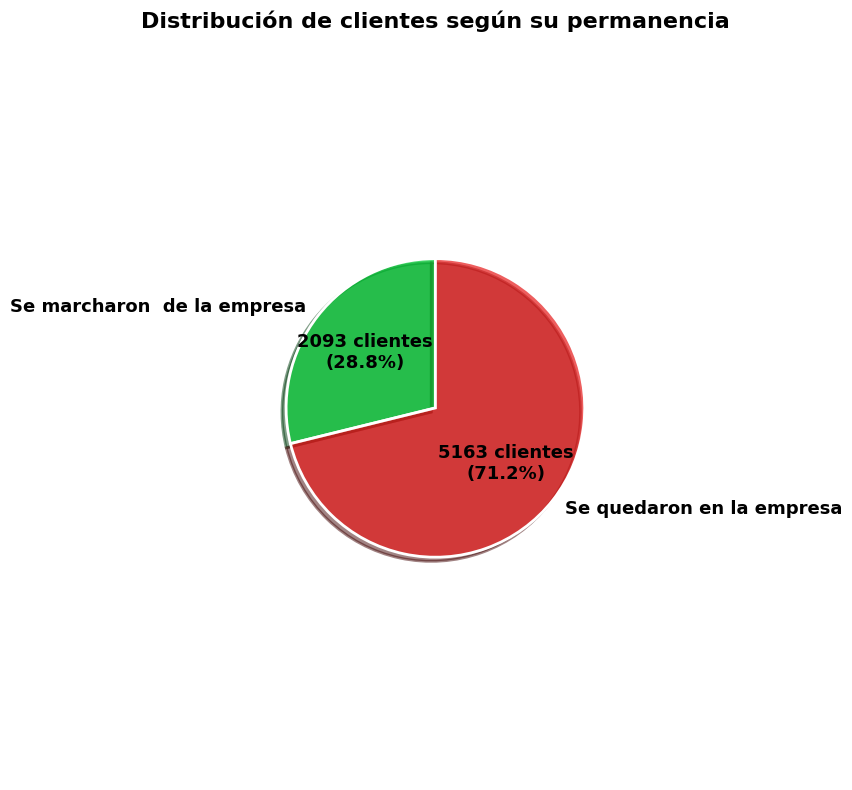

In [100]:
import matplotlib.pyplot as plt

# Mapeo legible
labels_map = {0: 'Se quedaron en la empresa', 1: 'Se marcharon  de la empresa'}
churn_mapeado = df_normalizado['churn'].map(labels_map)

# Conteo ordenado
conteo = churn_mapeado.value_counts().sort_index()

# Colores RGBA (transparencia suave)
colores = [
    (0.0, 0.8, 0.2, 0.7),  # Verde
    (0.9, 0.1, 0.1, 0.7)   # Rojo
]

# Función para etiquetas personalizadas
def formato_etiquetas(pct, total):
    cantidad = int(round(pct * total / 100.0))
    return f'{cantidad} clientes\n({pct:.1f}%)'

# Gráfico de pastel
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    conteo,
    labels=conteo.index,
    colors=colores,
    startangle=90,
    autopct=lambda pct: formato_etiquetas(pct, sum(conteo)),
    textprops={'fontsize': 13, 'fontweight': 'bold'},
    wedgeprops={'edgecolor': 'white', 'linewidth': 2},
    shadow=True
)

# Título y ajuste visual
plt.title('Distribución de clientes según su permanencia', fontsize=16, fontweight='bold')
plt.axis('equal')  # Asegura un círculo perfecto
plt.tight_layout()
plt.show()


### Recuento de la evasión por variables categóricas

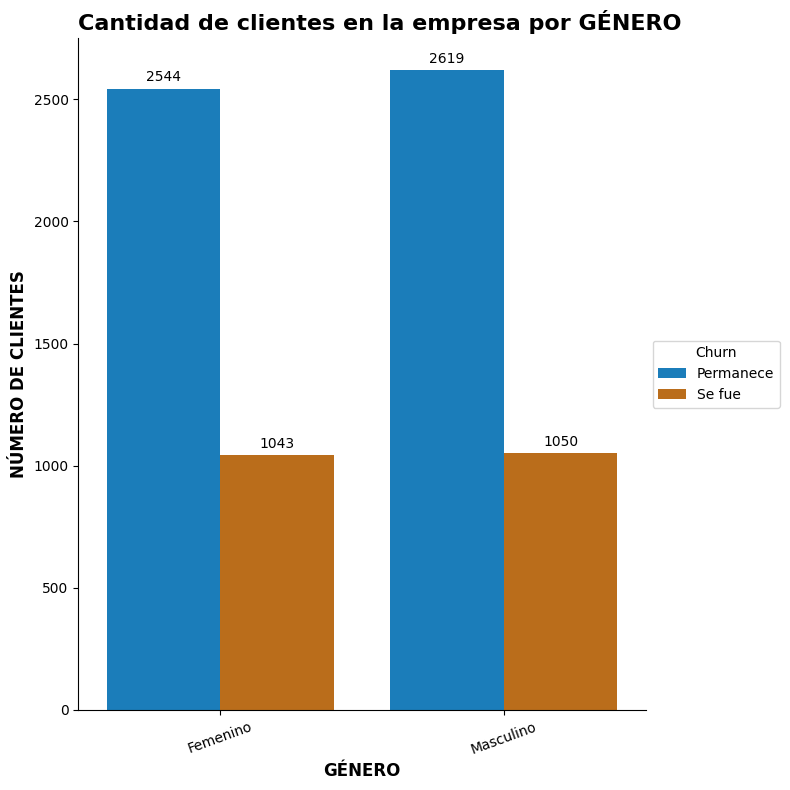

In [101]:
import seaborn as sns

conteo_contrato = df_normalizado.groupby(['género', 'churn']).size().reset_index(name='Total')

palette = {
    'Permanece': '#0083d5',
    'Se fue': '#d56e00'
}

conteo_contrato['churn'] = conteo_contrato['churn'].map({0: 'Permanece', 1: 'Se fue'})

fig, ax = plt.subplots(figsize=(8, 8))
sns.despine()

sns.barplot(
    data=conteo_contrato,
    x='género',
    y='Total',
    hue='churn',
    palette=palette,
    ax=ax
)

ax.set_title('Cantidad de clientes en la empresa por GÉNERO', fontsize=16, loc='left', fontweight='bold')
ax.set_xlabel('GÉNERO', fontsize=12, fontweight='bold')
ax.set_ylabel('NÚMERO DE CLIENTES', fontsize=12, fontweight='bold')
ax.tick_params(axis='x', rotation=20)
ax.legend(title='Churn', loc='center left', bbox_to_anchor=(1, 0.5))

for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10, padding=3)

plt.tight_layout()
plt.show()

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Paleta de colores mejorada (contraste + estética)
palette = {'Permanece': '#00BFC4', 'Se fue': '#F8766D'}

# Diccionario para nombres legibles
nombres_nuevos = {
    'multiples_lineas_telefonicas': 'MÚLTIPLES LÍNEAS TELEFÓNICAS',
    'servicio_internet': 'SERVICIO DE INTERNET',
    'seguridad_online': 'SEGURIDAD ONLINE',
    'respaldo_online': 'RESPALDO ONLINE',
    'proteccion_del_dispositivo': 'PROTECCIÓN DEL DISPOSITIVO',
    'soporte_tecnico': 'SOPORTE TÉCNICO',
    'servicio_tv': 'SERVICIO DE TV',
    'servicio_de_peliculas': 'SERVICIO DE PELÍCULAS',
    'tipo_de_contrato': 'TIPO DE CONTRATO',
    'forma_de_pago': 'FORMA DE PAGO'
}

def graficar_churn(df_normalizado, columnas):
    df_temp = df_normalizado.copy()
    df_temp['churn'] = df_temp['churn'].map({0: 'Permanece', 1: 'Se fue'})

    # Cálculo dinámico de subplots
    num_cols = 2
    num_rows = (len(columnas) + num_cols - 1) // num_cols
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(22, num_rows * 6))
    axes = axes.flatten()

    for i, col in enumerate(columnas):
        conteo = df_temp.groupby([col, 'churn']).size().reset_index(name='Total')
        conteo[col] = conteo[col].astype(str).str.upper()

        sns.barplot(
            data=conteo,
            x=col,
            y='Total',
            hue='churn',
            palette=palette,
            ax=axes[i]
        )

        nombre_legible = nombres_nuevos.get(col, col.replace('_', ' ').upper())

        axes[i].set_title(f'CANTIDAD DE CLIENTES POR {nombre_legible}', fontsize=15, fontweight='bold', loc='left')
        axes[i].set_xlabel(nombre_legible, fontsize=12, fontweight='bold')
        axes[i].set_ylabel('NÚMERO DE CLIENTES', fontsize=12, fontweight='bold')
        axes[i].tick_params(axis='x', rotation=20)

        axes[i].legend(
            title='Estado',
            loc='upper right',
            fontsize=10,
            title_fontsize=11
        )

        for container in axes[i].containers:
            axes[i].bar_label(container, fmt='%d', fontsize=9, padding=2)

        sns.despine(ax=axes[i])

    # Eliminar ejes vacíos si sobran
    for j in range(len(columnas), len(axes)):
        fig.delaxes(axes[j])

    plt.subplots_adjust(hspace=0.8, wspace=0.4)
    plt.tight_layout()
    plt.show()


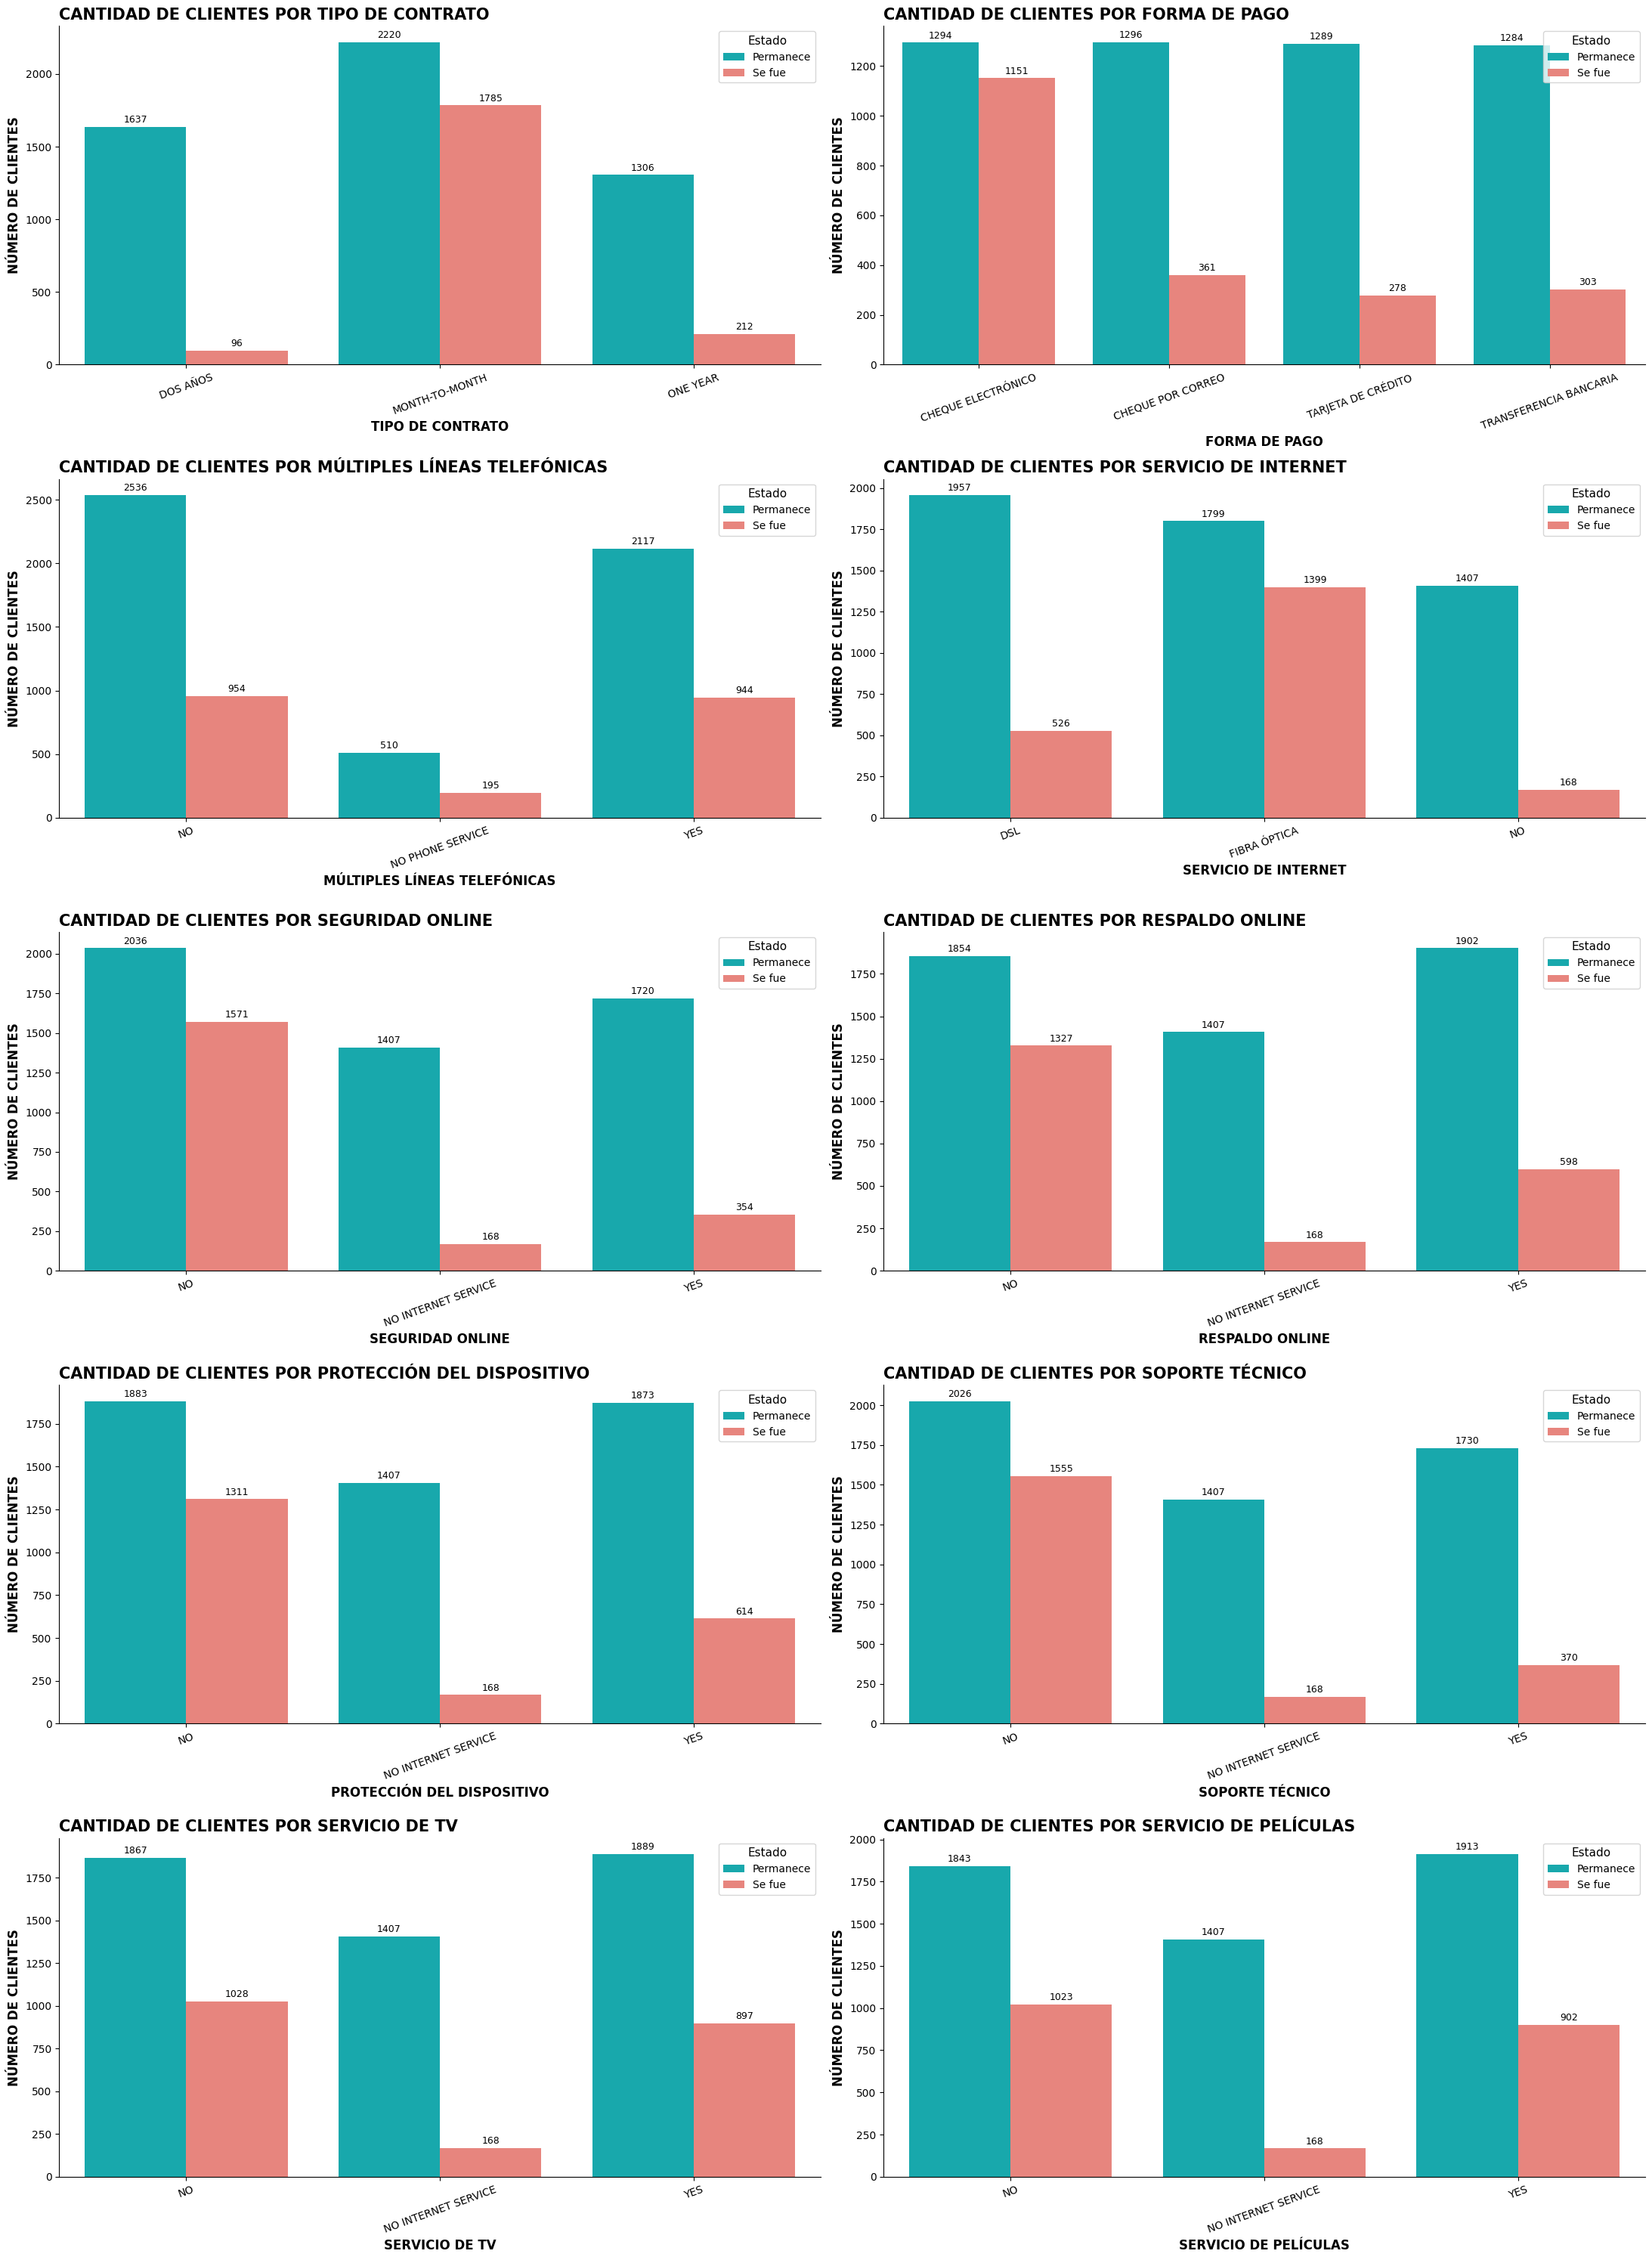

In [103]:
columnas_categoricas = [
    'tipo_de_contrato',
    'forma_de_pago',
    'multiples_lineas_telefonicas',
    'servicio_internet',
    'seguridad_online',
    'respaldo_online',
    'proteccion_del_dispositivo',
    'soporte_tecnico',
    'servicio_tv',
    'servicio_de_peliculas',
]

graficar_churn(df_normalizado, columnas_categoricas)

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def graficar_churn_valores_porcentuales(df_normalizado, columnas):
    df_temp = df_normalizado.copy()
    df_temp['churn'] = df_temp['churn'].map({0: 'PERMANECE', 1: 'SE FUE'})

    filas = (len(columnas) + 1) // 2
    fig, axes = plt.subplots(nrows=filas, ncols=2, figsize=(22, filas * 5))
    axes = axes.flatten()

    for i, col in enumerate(columnas):
        conteo = df_temp.groupby([col, 'churn']).size().reset_index(name='Total')
        conteo[col] = conteo[col].astype(str).str.upper()

        conteo['Porcentaje'] = conteo.groupby(col)['Total'].transform(lambda x: x / x.sum() * 100)

        pivot = conteo.pivot(index=col, columns='churn', values='Porcentaje').fillna(0)
        pivot = pivot[['PERMANECE', 'SE FUE']]

        ax = axes[i]
        y_pos = np.arange(len(pivot))
        width = 0.35

        ax.barh(y_pos - width/2, pivot['PERMANECE'], height=width, label='PERMANECE', color='#00baff')
        ax.barh(y_pos + width/2, pivot['SE FUE'], height=width, label='SE FUE', color='#ff7f0e')

        ax.set_yticks(y_pos)
        ax.set_yticklabels(pivot.index, fontsize=10)

        nombre_columna = nombres_nuevos.get(col, col.replace('_', ' ').upper())
        ax.set_title(f'% DE CLIENTES POR {nombre_columna}', fontsize=15, fontweight='bold', loc='left')
        ax.set_xlabel('PORCENTAJE (%)', fontsize=12, fontweight='bold')
        ax.set_ylabel(nombre_columna, fontsize=12, fontweight='bold')

        max_valor = pivot.values.max()
        ax.set_xlim(0, min(100, np.ceil(max_valor + 5)))

        # Etiquetas de porcentaje sobre cada barra
        for j, valor in enumerate(pivot['PERMANECE']):
            if valor > 0:
                ax.text(valor + 0.5, y_pos[j] - width/2, f"{valor:.1f}%", va='center', fontsize=9)

        for j, valor in enumerate(pivot['SE FUE']):
            if valor > 0:
                ax.text(valor + 0.5, y_pos[j] + width/2, f"{valor:.1f}%", va='center', fontsize=9)

        sns.despine(ax=ax)

        # Leyenda
        ax.legend(
            title='Estado',
            loc='upper right',
            fontsize=10,
            title_fontsize=11,
            frameon=False
        )

    # Eliminar ejes no usados
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.subplots_adjust(hspace=0.6, wspace=0.4)
    plt.show()


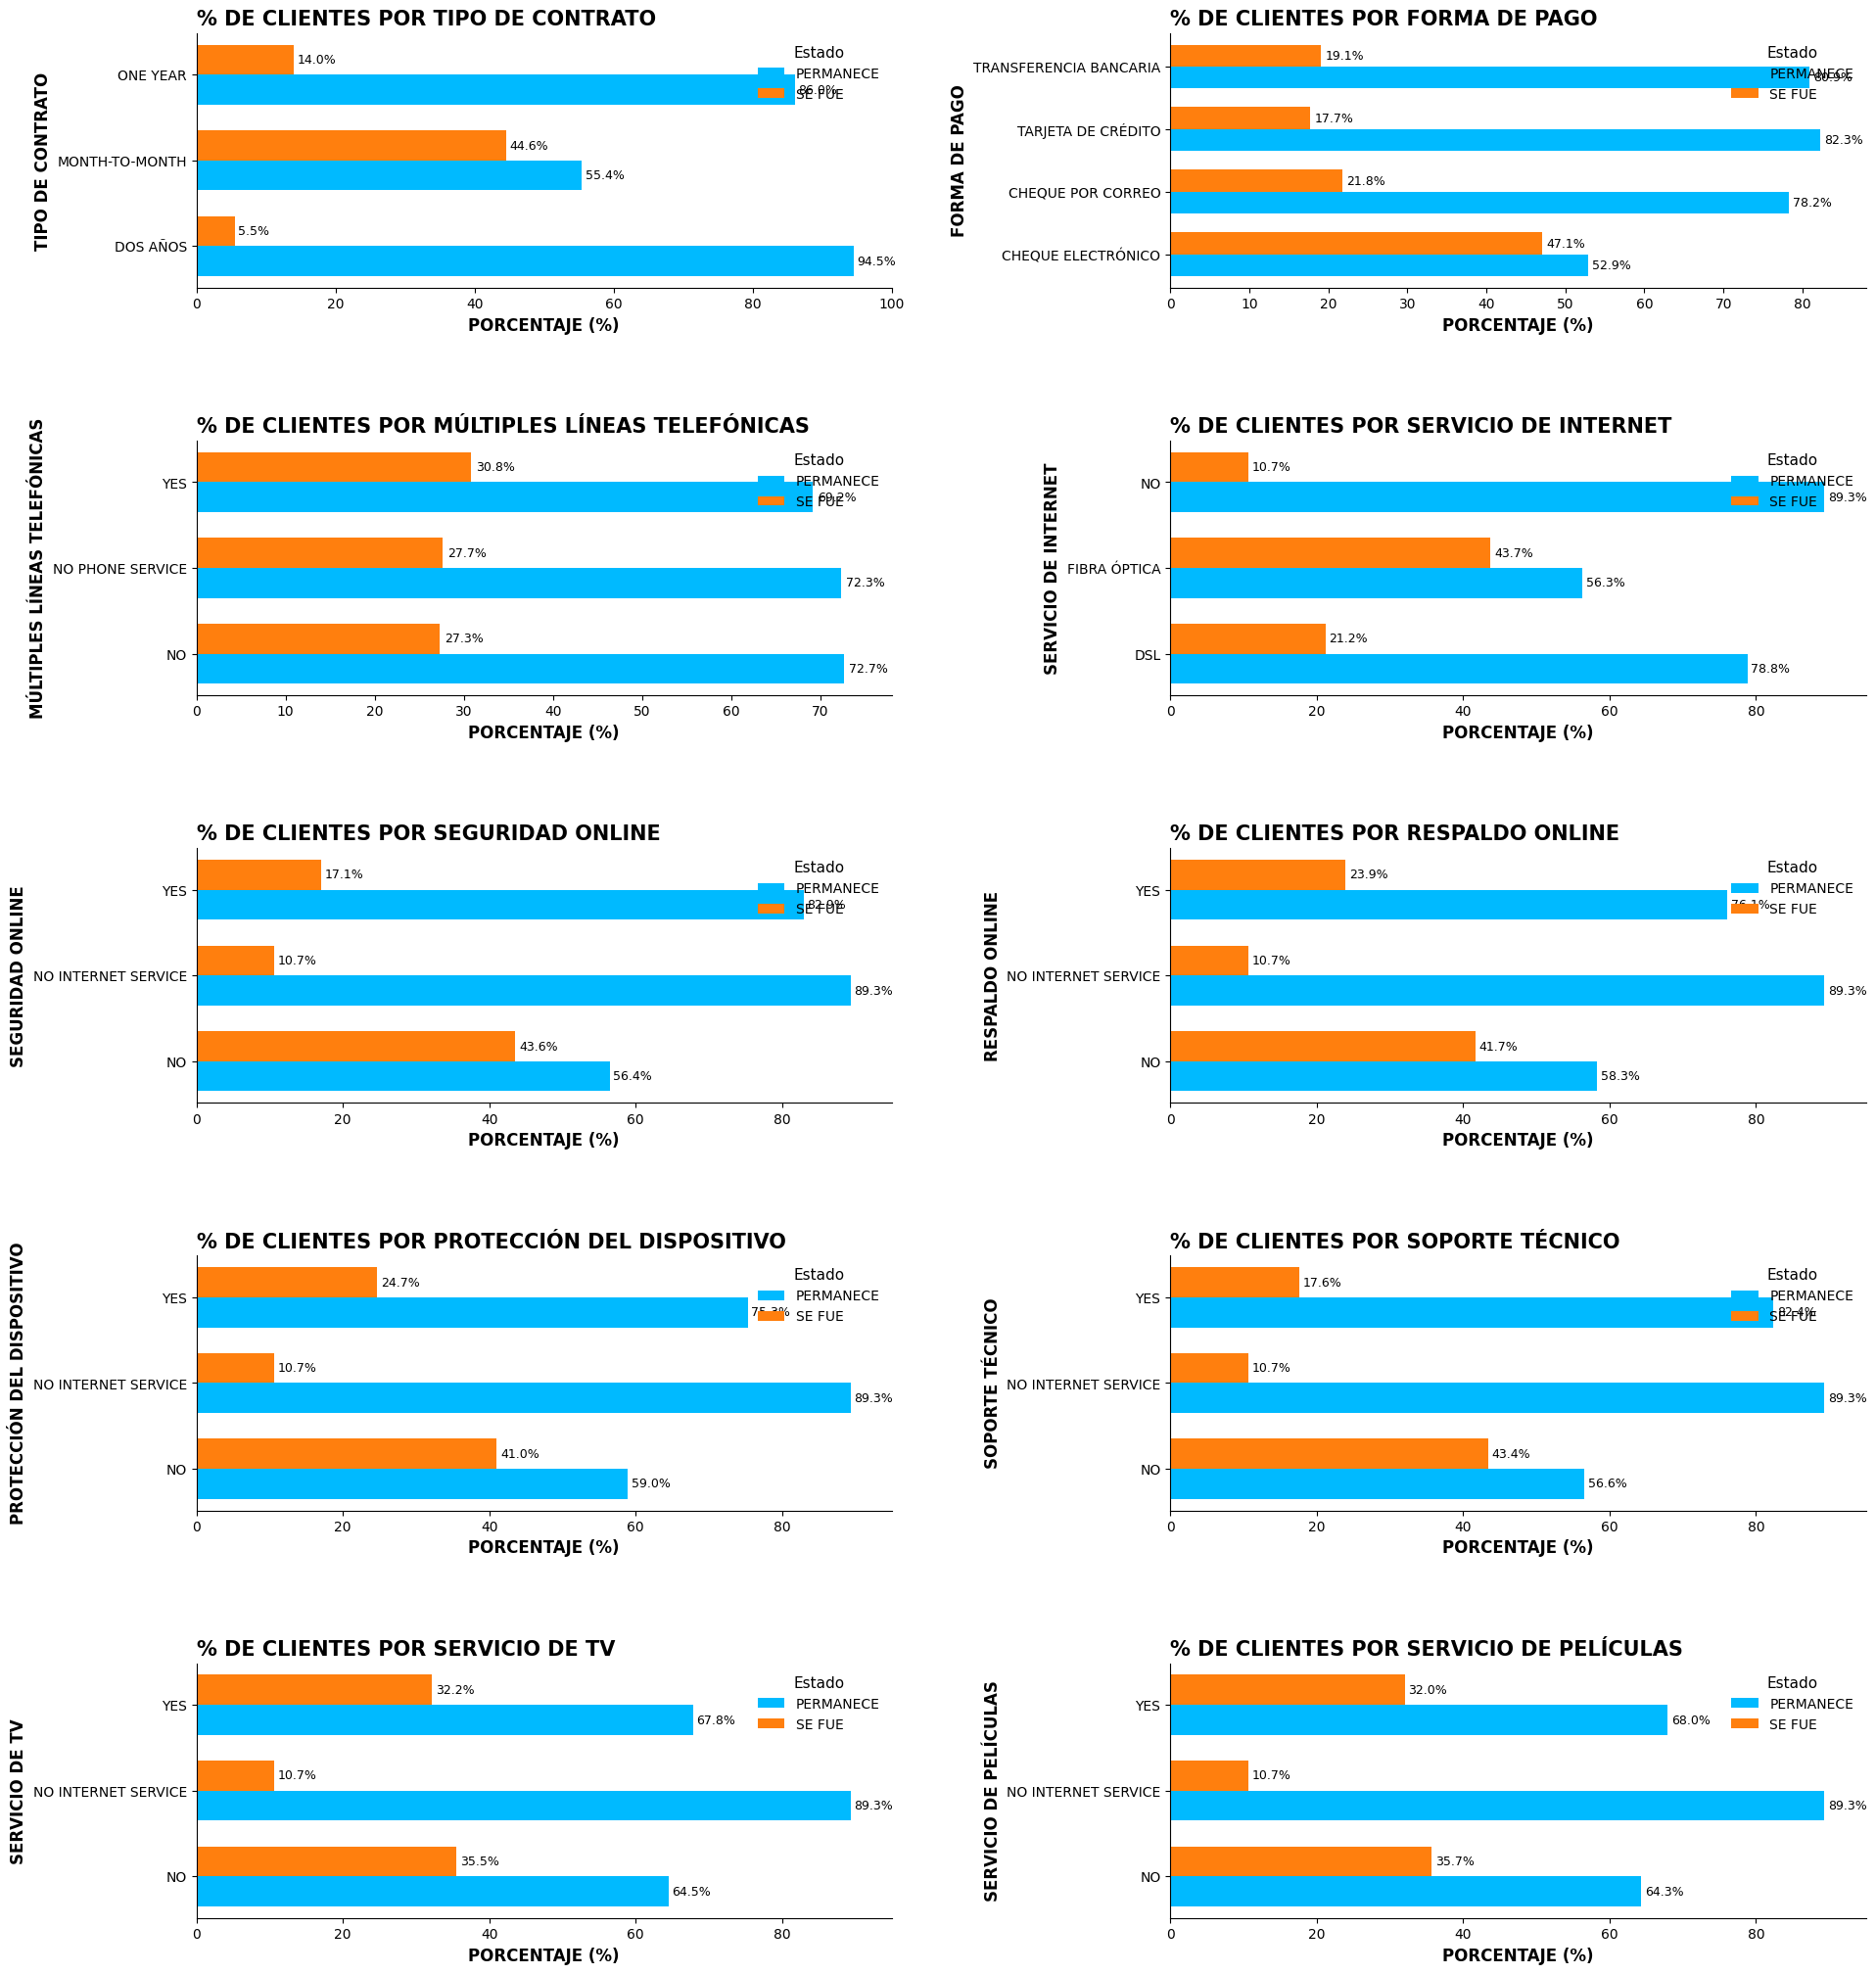

In [106]:
columnas_categoricas = [
    'tipo_de_contrato',
    'forma_de_pago',
    'multiples_lineas_telefonicas',
    'servicio_internet',
    'seguridad_online',
    'respaldo_online',
    'proteccion_del_dispositivo',
    'soporte_tecnico',
    'servicio_tv',
    'servicio_de_peliculas',
]

graficar_churn_valores_porcentuales(df_normalizado, columnas_categoricas)

### Grafico para mostrar la evasion de forma numérica

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

palette = {
    0: '#8A2BE2',
    1: '#FFD700'
}

colores_lineas = {
    'Mediana churn=0': '#000000',
    'Media churn=0': '#00FF00',
    'Mediana churn=1': '#FF0000',
    'Media churn=1': '#00FFFF'
}

nombres_ejes = {
    'meses_de_contrato': 'MESES DE CONTRATO',
    'cargos_mensuales': 'CARGOS MENSUALES',
    'cargos_totales': 'CARGOS TOTALES'
}

def graficar_distribucion_numericas(df_normalizado, columnas):
    df_temp = df_normalizado.copy()

    for col in columnas:
        nombre_legible = nombres_ejes.get(col, col.capitalize())

        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(21, 5))
        sns.despine()

        # BOXPLOT
        sns.boxplot(
            data=df_temp,
            x='churn',
            y=col,
            hue='churn',
            palette=palette,
            ax=axes[0],
            legend=False
        )

        mediana = df_temp.groupby('churn')[col].median()
        media = df_temp.groupby('churn')[col].mean()

        for estado in [0, 1]:
          label_mediana = f'Mediana churn={estado}'
          label_media = f'Media churn={estado}'

          axes[0].axhline(
              y=mediana[estado],
              color=colores_lineas[label_mediana],
              linestyle='--',
              linewidth=2,
              alpha=0.9,
              label=label_mediana
              )
          axes[0].axhline(
              y=media[estado],
              color=colores_lineas[label_media],
              linestyle='-',
              linewidth=2,
              alpha=0.9,
              label=label_media
              )
          axes[0].legend(framealpha=0.5, fontsize=8, loc='upper center')

        axes[0].set_title(f'BOXPLOT DE {nombre_legible}', fontsize=13, fontweight='bold')
        axes[0].set_xlabel('ESTADO DE CLIENTE', fontsize=10, fontweight='bold')
        axes[0].set_ylabel(nombre_legible, fontsize=10, fontweight='bold')

        # VIOLIN PLOT
        sns.violinplot(
            data=df_temp,
            x='churn',
            y=col,
            hue='churn',
            palette=palette,
            ax=axes[1],
            legend=False
        )

        for estado in [0, 1]:
          label_mediana = f'Mediana churn={estado}'
          label_media = f'Media churn={estado}'

          axes[1].axhline(
              y=mediana[estado],
              color=colores_lineas[label_mediana],
              linestyle='--',
              linewidth=2,
              alpha=0.9,
              label=label_mediana
              )
          axes[1].axhline(
              y=media[estado],
              color=colores_lineas[label_media],
              linestyle='-',
              linewidth=2,
              alpha=0.9,
              label=label_media
              )
          axes[1].legend(framealpha=0.5, fontsize=8, loc='upper center')

        axes[1].set_title(f'VIOLIN PLOT DE {nombre_legible}', fontsize=13, fontweight='bold')
        axes[1].set_xlabel('ESTADO DE CLIENTE', fontsize=10, fontweight='bold')
        axes[1].set_ylabel(nombre_legible, fontsize=10, fontweight='bold')

        # KDE
        for estado, label in zip([0, 1], ['Permanece', 'Se fue']):
            subset = df_temp[df_temp['churn'] == estado]
            sns.kdeplot(
                subset[col].astype(float),
                fill=True,
                label=label,
                ax=axes[2],
                color=palette[estado],
                alpha=0.8,
                linewidth=2
            )

        axes[2].set_title(f'DISTRIBUCIÓN KDE de {nombre_legible}', fontsize=13, fontweight='bold')
        axes[2].set_xlabel(nombre_legible, fontsize=10, fontweight='bold')
        axes[2].set_ylabel('DENSIDAD', fontsize=10, fontweight='bold')
        axes[2].legend(title='Churn')

        plt.tight_layout()
        plt.subplots_adjust(bottom=0.15)
        plt.show()

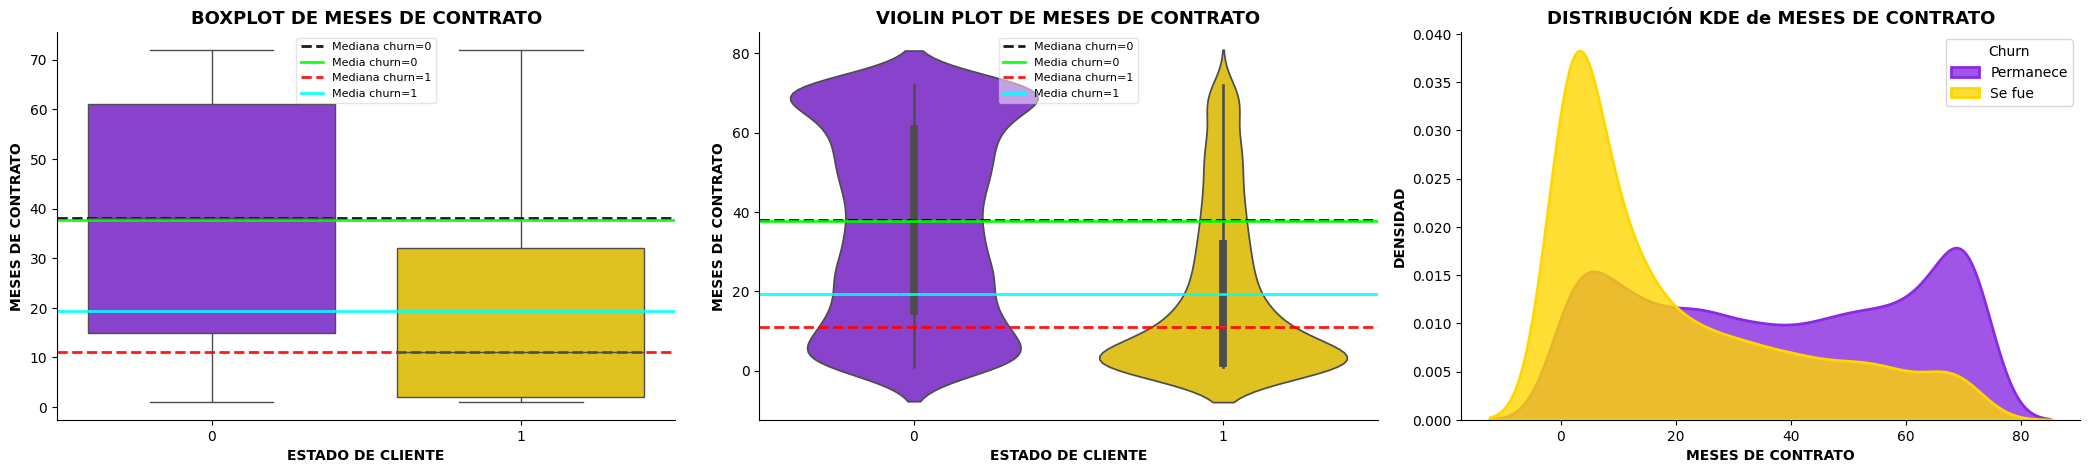

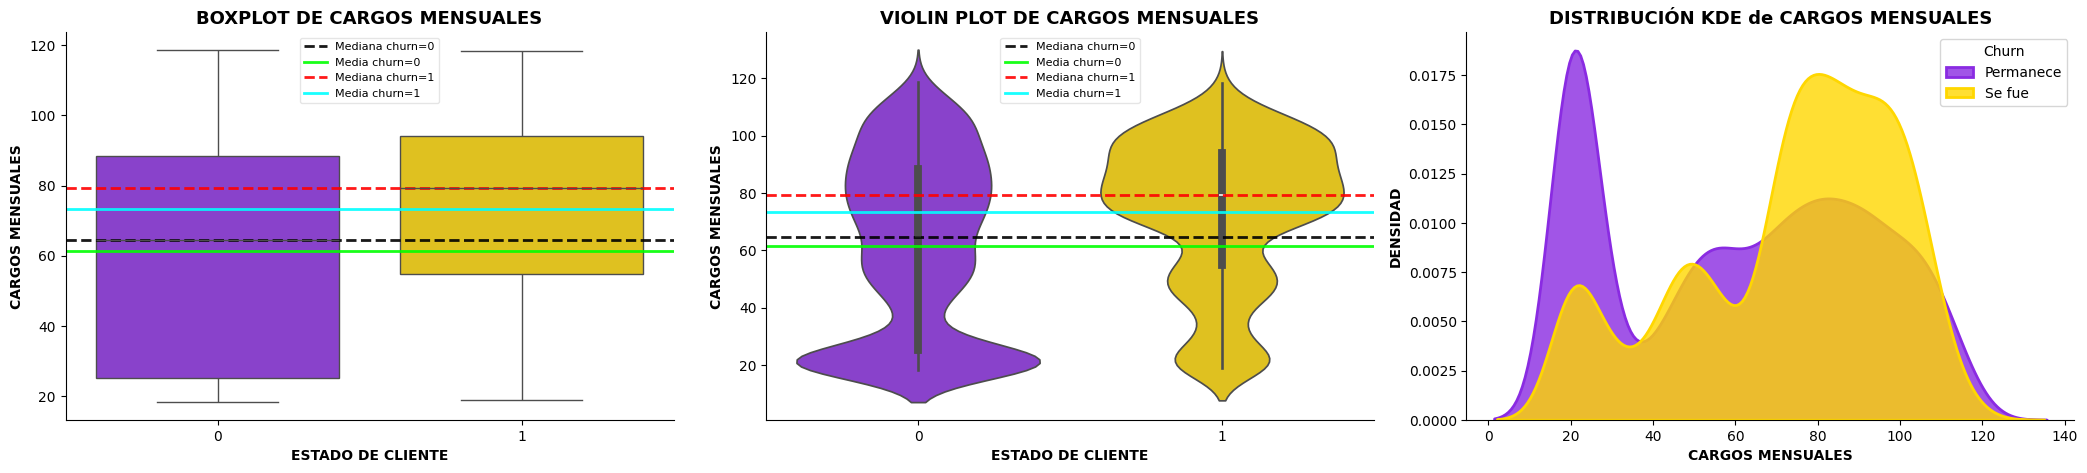

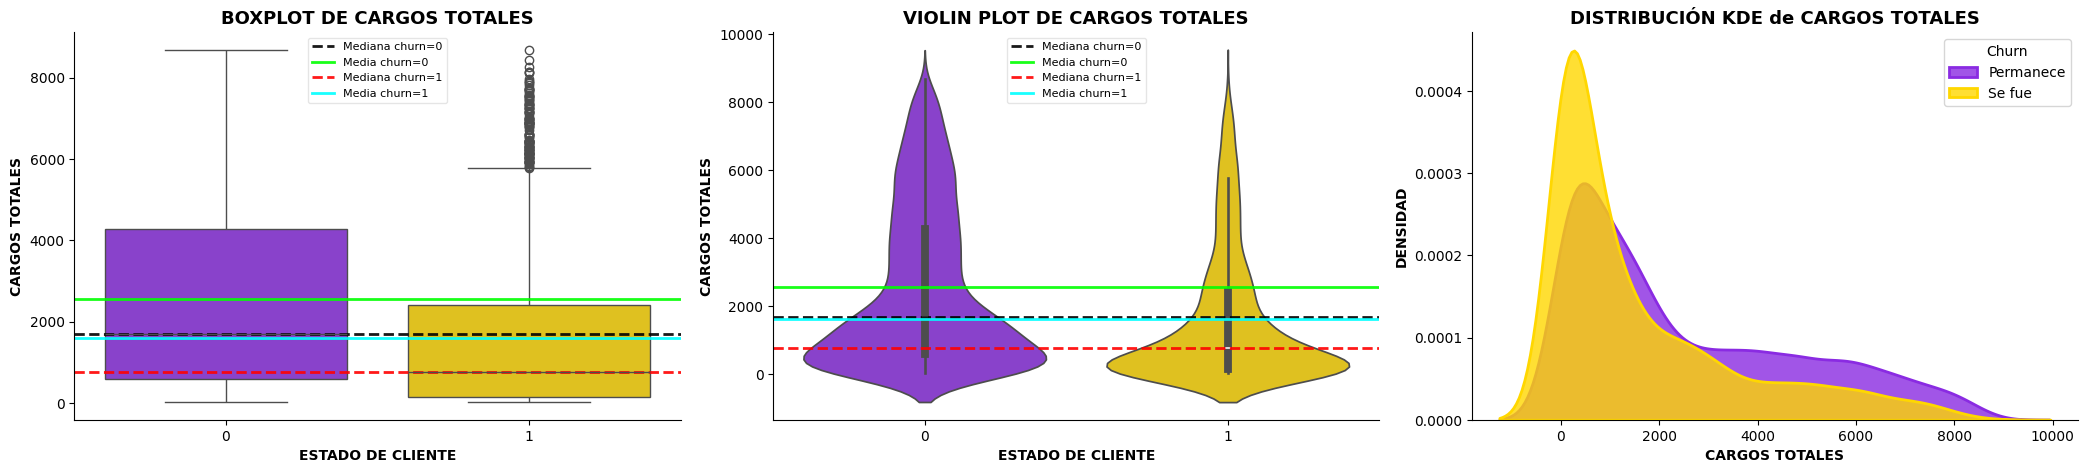

In [108]:
columnas_numericas = ['meses_de_contrato', 'cargos_mensuales', 'cargos_totales']
graficar_distribucion_numericas(df_normalizado, columnas_numericas)

###  Análisis de correlación

### Dispercion de clientes

In [110]:
import plotly.express as px

# Mapeo de estado del cliente para claridad
df_temp = df_normalizado.copy()
df_temp['estado_cliente'] = df_temp['churn'].map({0: 'PERMANECE', 1: 'SE FUE'})

# Gráfico tipo Strip
fig = px.strip(
    df_temp,
    x="estado_cliente",
    y="cuentas_diarias",
    color="estado_cliente",
    stripmode='overlay',
    color_discrete_map={
        'PERMANECE': '#0083d5',
        'SE FUE': '#d56e00'
    },
    title="RELACIÓN ENTRE LAS CUENTAS DIARIAS Y EL ESTADO DEL CLIENTE",
    labels={
        'estado_cliente': 'ESTADO DEL CLIENTE',
        'cuentas_diarias': 'CUENTAS DIARIAS'
    }
)

# Mejoras de estilo
fig.update_traces(jitter=0.35, marker=dict(opacity=0.6, size=6), selector=dict(type='scatter'))

fig.update_layout(
    title_font=dict(size=18, family='Arial', color='black'),
    xaxis_title_font=dict(size=14),
    yaxis_title_font=dict(size=14),
    legend_title_text='Estado',
    plot_bgcolor='white'
)

fig.show()



### Relación entre la cantidad de servicios y el estado del cliente

In [114]:
import plotly.express as px

# Paso 1: Asegurar que la columna exista
columnas_servicios = [
    'servicio_telefonico', 'multiples_lineas_telefonicas', 'servicio_internet', 'seguridad_online',
    'respaldo_online', 'proteccion_del_dispositivo', 'soporte_tecnico',
    'servicio_tv', 'servicio_de_peliculas'
]

servicios_binarios = df_normalizado[columnas_servicios].apply(
    lambda col: ((col == 'Yes') | (col == 'DSL') | (col == 'Fibra óptica') | (col == 1))
).astype(int)

df_normalizado['cantidad_servicios'] = servicios_binarios.sum(axis=1)

# Paso 2: Crear gráfico tipo strip
fig = px.strip(
    df_normalizado,
    x='churn',
    y='cantidad_servicios',
    color='churn',
    stripmode='overlay',
    color_discrete_map={0: '#0083d5', 1: '#d56e00'},
    title="RELACIÓN ENTRE CANTIDAD DE SERVICIOS Y ESTADO DEL CLIENTE",
    labels={'churn': 'ESTADO DEL CLIENTE', 'cantidad_servicios': 'CANTIDAD DE SERVICIOS'}
)

# Ajuste estético
fig.update_traces(jitter=0.35, marker=dict(size=6, opacity=0.6))
fig.show()



### Matriz de correlación

In [115]:
 import plotly.express as px

# Columnas numéricas a considerar
columnas_numericas = [
    'meses_de_contrato',
    'cargos_totales',
    'cuentas_diarias',
    'churn'
]

# Calcular matriz de correlación
correlaciones = df_normalizado[columnas_numericas].corr()

# Ordenar por relación absoluta con churn
orden = correlaciones['churn'].abs().sort_values(ascending=False).index.tolist()
correlaciones_ordenadas = correlaciones.loc[orden, orden]

# Crear heatmap con mejoras visuales
fig = px.imshow(
    correlaciones_ordenadas,
    text_auto=".2f",
    aspect="auto",
    color_continuous_scale="RdBu_r",  # Mejor interpretación: negativo a positivo
    title="🔍 MATRIZ DE CORRELACIÓN ENTRE VARIABLES NUMÉRICAS"
)

# Refinar diseño
fig.update_layout(
    margin=dict(l=60, r=60, t=60, b=60),
    xaxis_title="VARIABLES",
    yaxis_title="VARIABLES",
    title_font_size=18,
    font=dict(size=12)
)

fig.update_xaxes(tickangle=45)
fig.show()


#📄Informe final

El presente análisis tiene como objetivo comprender los factores que influyen en la evasión de clientes (churn) dentro de una empresa de telecomunicaciones. El churn representa a los clientes que deciden abandonar el servicio, lo cual tiene un impacto económico importante.

Mediante técnicas de análisis exploratorio de datos (EDA) y visualizaciones, se busca identificar patrones de comportamiento, variables relevantes y diferencias clave entre clientes que permanecen y los que se retiran. Esta información permitirá generar estrategias de retención más efectivas.

**Limpieza y Tratamiento de datos**

A continuación, se describen los pasos realizados para preparar los datos:

Importación de los datos desde un archivo JSON (TelecomX_Data.json).

Revisión de tipos de datos y valores nulos con df.info() y df.isnull().sum().

Conversión de variables categóricas a formatos estándar (por ejemplo, 'Yes', 'No', 'DSL', 'Fibra óptica').

**Creación de columnas derivadas como:**

cuentas_diarias: promedio de cargos diarios por cliente.

cantidad_servicios: total de servicios contratados por cliente.

Mapeo de variables binarias como 'churn' a 'SE FUE' y 'PERMANECE'

 **Análisis Exploratorio de Datos**

Se realizaron diversos gráficos y análisis para explorar la distribución y relación entre variables:

Distribución general de churn:
Gráfico circular muestra qué porcentaje de clientes permanecen y cuántos se van.

Churn por género:
Comparación mediante gráfico de barras entre hombres y mujeres.

Churn por tipo de servicio:
Gráficos individuales para:

Seguridad online, servicio de películas, respaldo online, entre otros.

Visualización en porcentaje con gráfico de barras horizontales.

Distribución de servicios por cliente:
Se calculó cuántos servicios tiene contratado cada cliente.

Se analizó la relación entre cantidad_servicios y churn con boxplot, violin y strip plots.

Análisis de correlación:
Se construyó una matriz de correlación para variables numéricas como:

meses_de_contrato, cuentas_diarias, cargos_totales.

Se identificaron relaciones moderadas entre churn y variables como:

meses_de_contrato (negativa): los clientes más antiguos tienden a quedarse.

cuentas_diarias (positiva): cargos más altos diarios están relacionados con mayor churn.
Un porcentaje importante de clientes está abandonando la empresa.

Los clientes con menos servicios contratados tienen mayor probabilidad de churn.

El uso del servicio de Internet y soporte técnico está relacionado con mayor permanencia.

Clientes con contratos mensuales presentan tasas de churn más altas.

Cargos diarios más altos se asocian con mayor churn, posiblemente por percepción de alto costo o bajo valor.

Clientes recientes (pocos meses de contrato) abandonan más que los antiguos.

**Recomendaciones Estratregicas**

Segmentación de riesgo: Enfocar esfuerzos de fidelización en clientes con contratos mensuales, pocos servicios y altas cuentas diarias.

 Campañas proactivas: Contactar a clientes recientes para garantizar una buena experiencia inicial.

 Bundle de servicios: Incentivar paquetes de servicios combinados que aumenten el valor percibido y reduzcan el churn.

 Revisión de tarifas: Analizar si cargos diarios están justificadamente altos y ofrecer alternativas más atractivas.

 Promover contratos a largo plazo: Ofrecer descuentos o beneficios por optar por contratos semestrales o anuales.


Este análisis proporciona una base sólida para la toma de decisiones estratégicas en la gestión de clientes. Utilizando los insights generados, la empresa puede disminuir la tasa de evasión y aumentar la fidelización, mejorando así su rentabilidad a largo plazo.
